In [316]:
'''
на базе
https://russianblogs.com/article/3135792742/

Оценка LB после подачи составляет 0,1143.

'''

'\nна базе\nhttps://russianblogs.com/article/3135792742/\n\nОценка LB после подачи составляет 0,1143.\n\n'

https://medium.com/@raghav96_77243/house-prices-in-ames-iowa-working-with-kaggle-91656d5ef6e0

Here is a breakdown of the techniques we are going to use:
1.Finding out if there are any duplicate entries in the dataset
2.Finding out about the type of columns: numeric and categorical
3.Finding out the missing data in each column
4.Filling in missing values with relevant data
5.Finding and removing outliers from the data

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

train_set=pd.read_csv('./data/train.csv')
test_set=pd.read_csv('./data/test.csv')

In [318]:
train_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Finding out if there are any duplicate entries in the dataset

In [319]:
uniqueRows = len(set(train_set.Id))
totalRows = len(train_set.Id)
duplicateRows = totalRows - uniqueRows

# Tip: Assert allows you to test simple stuff in your data analysis as you go/sanity checks
assert (duplicateRows==0)
duplicateRows

0

In [320]:
uniqueRows = len(set(test_set.Id))
totalRows = len(test_set.Id)
duplicateRows = totalRows - uniqueRows

# Tip: Assert allows you to test simple stuff in your data analysis as you go/sanity checks
assert (duplicateRows==0)
duplicateRows

0

Finding out about the type of columns: numeric and categorical

In [321]:
numeric = [col for col in train_set.columns if train_set.dtypes[col] != 'object']
categorical = [col for col in train_set.columns if train_set.dtypes[col] == 'object']
print(numeric)
print(categorical)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gara

Разделение train_set на train и valid

In [322]:
y = train_set['SalePrice']

In [323]:
x_train, x_valid, y_train, y_valid = train_test_split(train_set, y, test_size=0.33, shuffle=True, random_state=21) 

In [324]:
x_train.shape

(978, 81)

In [325]:
x_valid.shape

(482, 81)

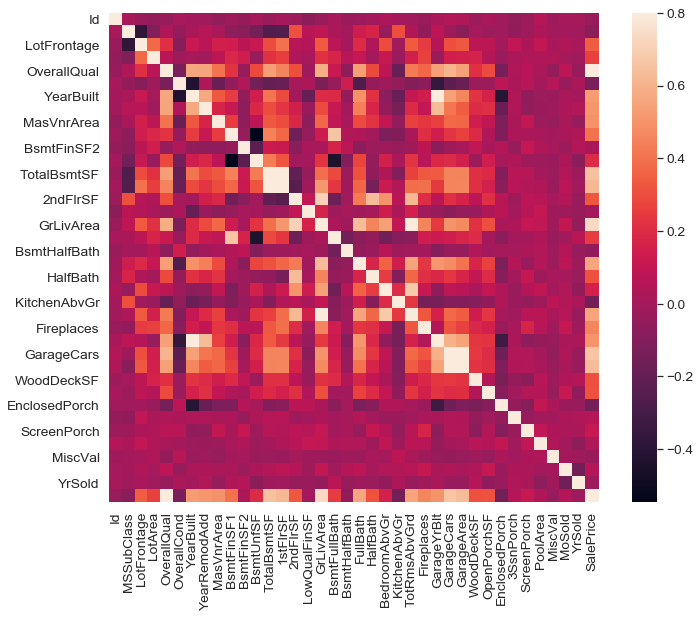

In [326]:
import seaborn as sns
corrmat = x_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=.8, square=True);

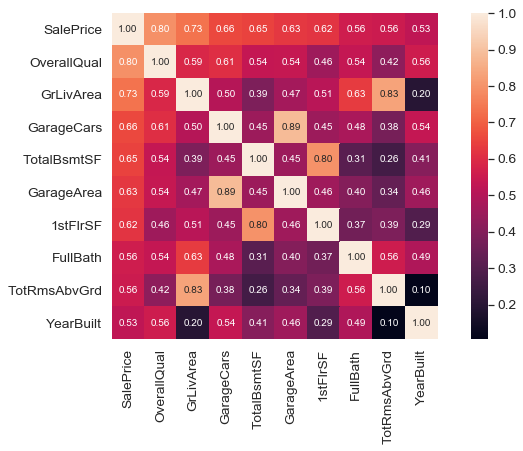

In [327]:
k = 10 # Number of selected variables
 
 # # posthaster () is the maximum sequence of output, and then select the index of the Salprice column after taking it.
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
 
 #cm Returns Related Arrangement Matrix
cm = np.corrcoef(x_train[cols].values.T) 
 
 #      
sns.set(font_scale=1.25)
 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [328]:
#train_set.drop(['Id'],axis=1,inplace=True)

<Figure size 864x432 with 0 Axes>

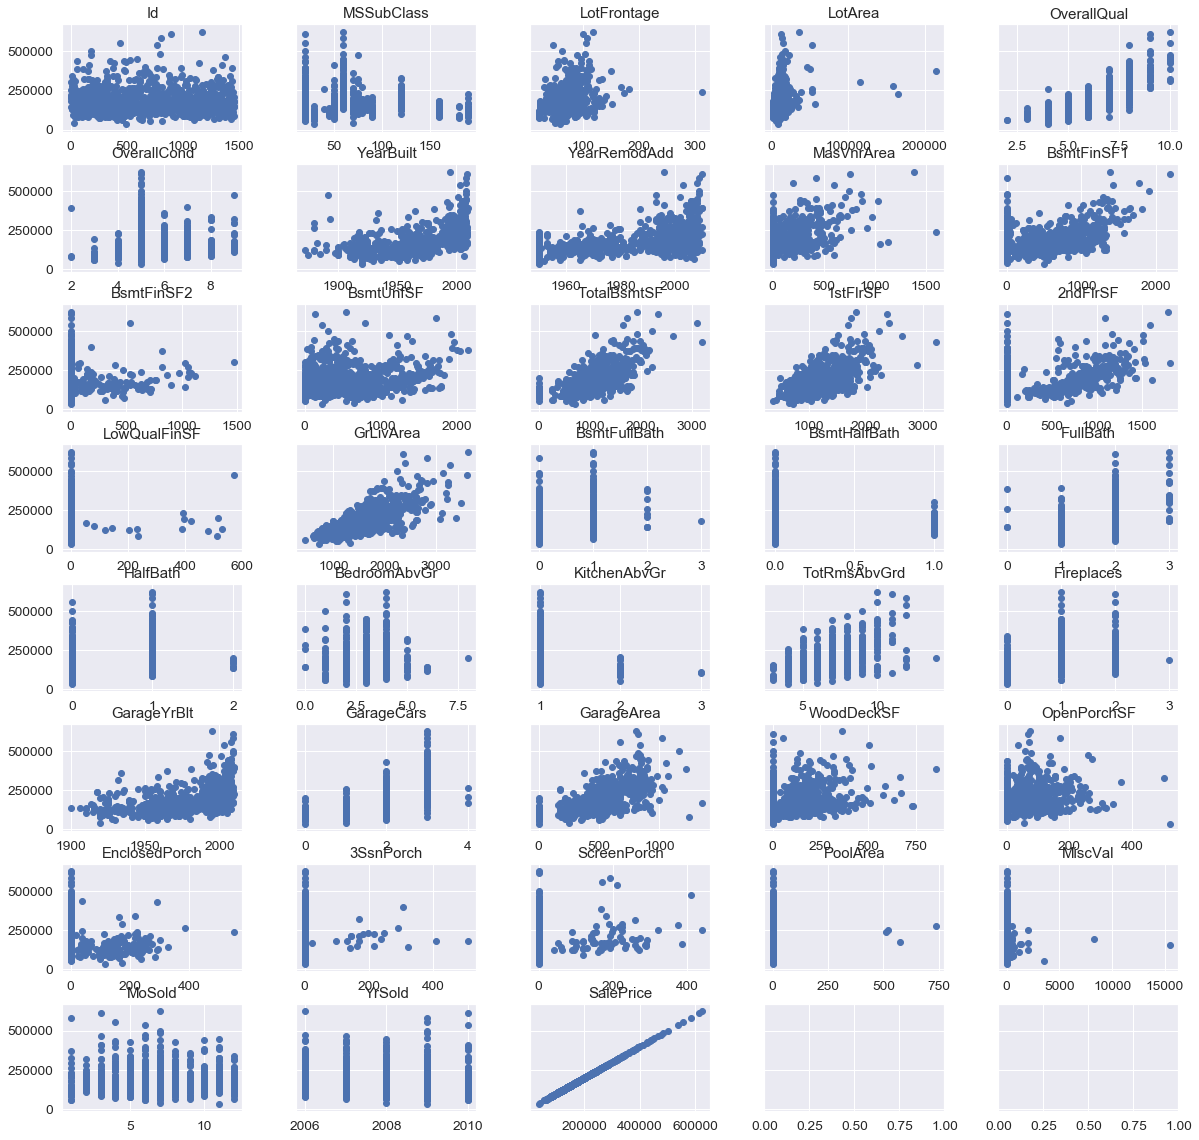

In [329]:
mask=x_train.dtypes!='object'
num_cols=tuple(x_train.dtypes[mask].index)

fig_col=5

plt.clf()
fig,axes=plt.subplots(
    int(np.ceil(len(num_cols)/fig_col)),
    fig_col,
    figsize=(20,20),
    sharey=True)

for i,col in zip(range(len(num_cols)),num_cols):
    axes[i//fig_col,i%fig_col].scatter(x_train.loc[:,col].values,x_train.loc[:,'SalePrice'].values)
    axes[i//fig_col,i%fig_col].set_title(col)
plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()

In [330]:
x_train.shape

(978, 81)

In [331]:
outliers_mask=(
              (x_train.loc[:,'LotFrontage']>300)|
              (x_train.loc[:,'1stFlrSF']>1400)|
              #((train_set.loc[:,'LowQualFinSF']>400)&(train_set.loc[:,'SalePrice']>400000))|
              #(train_set.loc[:,'BsmtFinSF1']>4000)|
              ((x_train.loc[:,'GrLivArea']>3200)&(train_set.loc[:,'SalePrice']<500000))|
              (x_train.loc[:,'LotArea']>100000)|
              (x_train.loc[:,'MiscVal']>7000)|
              (x_train.loc[:,'TotalBsmtSF']>3000)|
              (x_train.loc[:,'GarageCars']>4)|
              (x_train.loc[:,'GarageArea']>1100)|
              (x_train.loc[:,'FullBath']>1100)
              )
outliers_index=x_train[outliers_mask].index
x_train.drop(outliers_index,inplace=True)

C:\Users\Sergey\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Sergey\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [332]:
y_train.drop(outliers_index,inplace=True)

In [333]:
x_train.shape

(730, 81)

In [334]:
y_train.shape

(730,)

<Figure size 864x432 with 0 Axes>

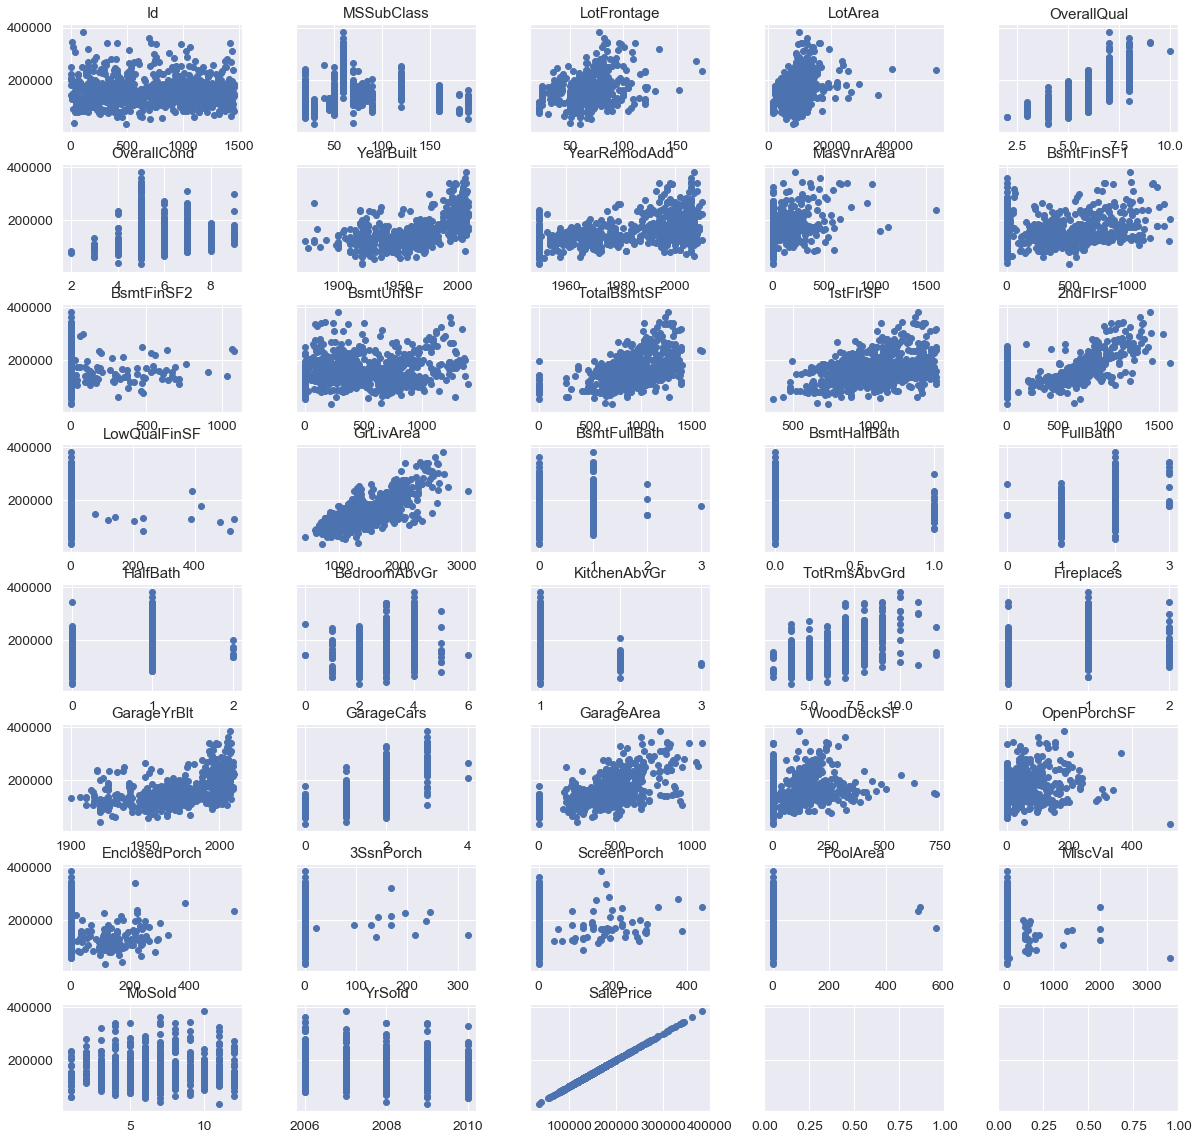

In [335]:
mask=x_train.dtypes!='object'
num_cols=tuple(x_train.dtypes[mask].index)

fig_col=5

plt.clf()
fig,axes=plt.subplots(
    int(np.ceil(len(num_cols)/fig_col)),
    fig_col,
    figsize=(20,20),
    sharey=True)

for i,col in zip(range(len(num_cols)),num_cols):
    axes[i//fig_col,i%fig_col].scatter(x_train.loc[:,col].values,x_train.loc[:,'SalePrice'].values)
    axes[i//fig_col,i%fig_col].set_title(col)
plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()

Объединенте train и test

In [336]:
train_set.loc[:,'SalePrice_log1p'] = np.log1p(train_set.loc[:,'SalePrice'])
Y_train=train_set.loc[:,'SalePrice_log1p'].values  # Y
train_set.drop(['SalePrice','SalePrice_log1p'],axis=1,inplace=True)
#train_set.drop(['SalePrice'],axis=1,inplace=True)
test_ID=test_set.loc[:,'Id']
test_set.drop(['Id'],axis=1,inplace=True)

n_train=train_set.shape[0]
n_test=test_set.shape[0]
data=pd.concat((train_set,test_set),axis=0).reset_index(drop=True)        # Сшивание наборов данных для очистки данных

print(n_train,n_test)

1460 1459


C:\Users\Sergey\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


Finding out the missing data in each column

In [337]:
data_na = (data.isnull().sum() / len(data)) * 100
#     0 0, and arrange it in descending order according to missing value
data_na = data_na.drop(data_na[data_na==0].index).sort_values(ascending=False)
 # With DateFrame
missing_data = pd.DataFrame({'missing_data' : data_na})
print(missing_data)

              missing_data
PoolQC           99.657417
MiscFeature      96.402878
Alley            93.216855
Fence            80.438506
Id               49.982871
FireplaceQu      48.646797
LotFrontage      16.649538
GarageCond        5.447071
GarageFinish      5.447071
GarageQual        5.447071
GarageYrBlt       5.447071
GarageType        5.378554
BsmtExposure      2.809181
BsmtCond          2.809181
BsmtQual          2.774923
BsmtFinType2      2.740665
BsmtFinType1      2.706406
MasVnrType        0.822199
MasVnrArea        0.787941
MSZoning          0.137033
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
Utilities         0.068517
Functional        0.068517
Electrical        0.034258
BsmtUnfSF         0.034258
Exterior1st       0.034258
Exterior2nd       0.034258
TotalBsmtSF       0.034258
GarageCars        0.034258
BsmtFinSF2        0.034258
BsmtFinSF1        0.034258
KitchenQual       0.034258
SaleType          0.034258
GarageArea        0.034258


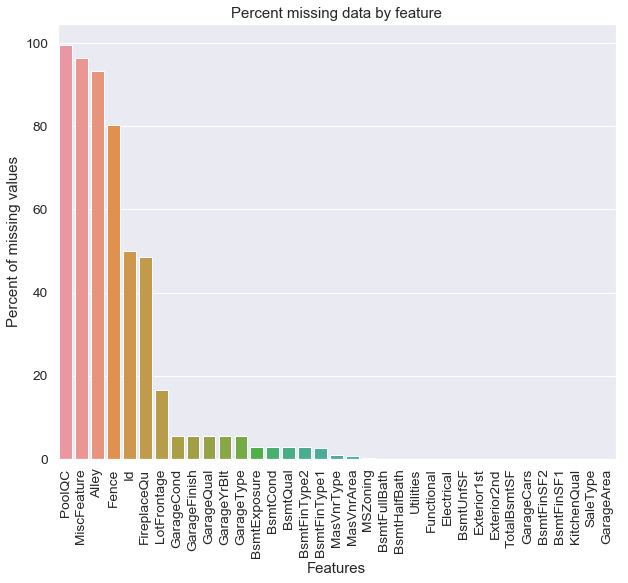

In [338]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=data_na.index, y=data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

или так

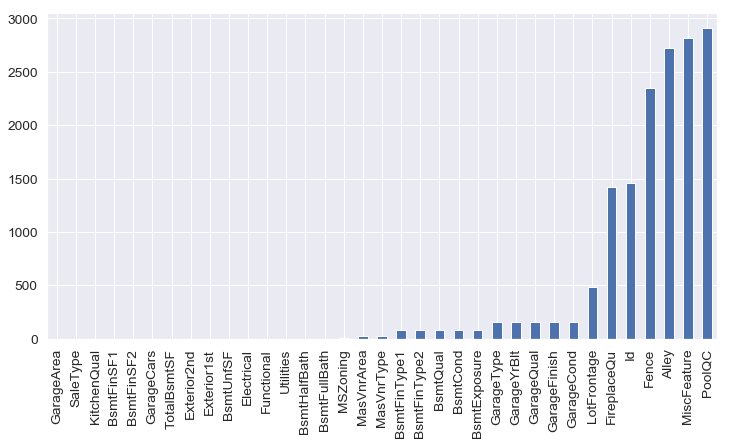

In [339]:
# Finding out the columns that are missing values in the dataset
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

We can clearly see the columns PoolQC, MiscFeature, Alley, Fence have a lot of values that are missing. But taking a closer look at the data, we understand the some part of each of these columns have information regarding the Alley or PoolQC and Fence. We will be filling in the data with the mean value of each of the columns later during the analysis.

Text(0,0.5,'Number of occurences')

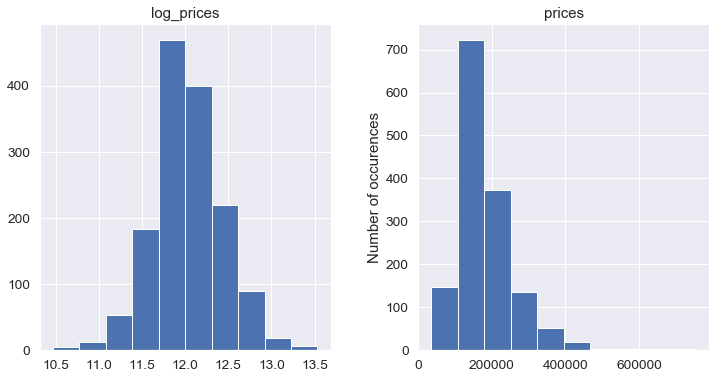

In [340]:
# Increases the size of the histogram to fit both normalized and raw data
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({'log_prices':np.log1p(y), 'prices': y})
prices.hist()
plt.ylabel('Number of occurences')

In [341]:
y = np.log1p(y)

In [342]:
data.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
Id              1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
dtype: int64

In [343]:
mask=data.dtypes!='object'
num_cols=tuple(data.dtypes[mask].index)

# Ложно пропущенные значения
fake_missing_cols=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                  'BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                  'PoolQC','Fence','MiscFeature']
for col in fake_missing_cols:
    data.loc[:,col].fillna('None',inplace=True)

# Числовое отсутствующее значение
num_col=['LotFrontage','LotFrontage']
for col in num_cols:
    median=data.loc[:,col].median()
    data.loc[:,col].fillna(median,inplace=True)

# Отсутствующее значение можно увидеть как столбец с 0
zero_cols=['GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
         'BsmtHalfBath','MasVnrArea']
for col in zero_cols:
    data.loc[:,col].fillna(0,inplace=True)

#Category Отсутствует значение
cat_missing_cols=['MSZoning','Utilities','Functional','Electrical','KitchenQual',
                 'Exterior1st','Exterior2nd','SaleType','MSSubClass']
for col in cat_missing_cols:
    mode=data.loc[:,col].mode()[0]
    data.loc[:,col].fillna(mode,inplace=True)

In [344]:
data.isnull().sum().sort_values(ascending=False)[:20]

YrSold           0
YearRemodAdd     0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
Functional       0
GarageArea       0
GarageCars       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
GarageYrBlt      0
EnclosedPorch    0
dtype: int64

Количество значений в категориальных данных

In [345]:
from sklearn.preprocessing import LabelEncoder

In [346]:
from sklearn.preprocessing import LabelEncoder
#data = train_set.copy()
categorical_features= data.select_dtypes(include=['object']).copy()
number=[len(data[features].unique()) for features in categorical_features]
data_tuples = list(zip(categorical_features,number))
categorical_data= pd.DataFrame(data_tuples, columns=['Features','Number of distinct values '])
categorical_data

,Features,Number of distinct values
0,Alley,3
1,BldgType,5
2,BsmtCond,5
3,BsmtExposure,5
4,BsmtFinType1,7
5,BsmtFinType2,7
6,BsmtQual,5
7,CentralAir,2
8,Condition1,9
9,Condition2,8


In [347]:
# упорядоченные категориальные признаки
orderd_cat_cols=['Street','Alley','LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual',
                 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual',
                 'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                 'PavedDrive','PoolQC','Fence']

In [348]:
for col in orderd_cat_cols:
    label = LabelEncoder()
    label.fit(list(data.loc[:,col].values))
    data[col] = label.transform(list(data.loc[:,col].values))

In [349]:
data[orderd_cat_cols]

,Street,Alley,LotShape,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,1,1,3,0,0,2,4,2,4,3,...,2,6,3,1,2,5,5,2,3,4
1,1,1,3,0,0,3,4,2,4,1,...,3,6,5,1,2,5,5,2,3,4
2,1,1,0,0,0,2,4,2,4,2,...,2,6,5,1,2,5,5,2,3,4
3,1,1,0,0,0,3,4,4,1,3,...,2,6,2,5,3,5,5,2,3,4
4,1,1,0,0,0,2,4,2,4,0,...,2,6,5,1,2,5,5,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1,1,3,0,0,3,4,4,4,3,...,3,6,3,6,1,3,3,2,3,4
2915,1,1,3,0,0,3,4,4,4,3,...,3,6,3,4,3,5,5,2,3,4
2916,1,1,3,0,0,3,4,4,4,3,...,3,6,5,5,3,5,5,2,3,4
2917,1,1,3,0,0,3,4,2,4,0,...,3,6,3,6,1,3,3,2,3,2


Разработка функций (с возможностью оптимизации)

In [350]:
# Внутренняя общая площадь
data.loc[:,'TotalSF']=data.loc[:,'TotalBsmtSF']+data.loc[:,'1stFlrSF']+data.loc[:,'2ndFlrSF']
data.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1,inplace=True)

data.loc[:,'TotalHalfBath']=data.loc[:,'BsmtHalfBath']+data.loc[:,'HalfBath']
data.loc[:,'TotalFullBath']=data.loc[:,'BsmtFullBath']+data.loc[:,'FullBath']
data.drop(['BsmtHalfBath','HalfBath','BsmtFullBath','FullBath'],axis=1,inplace=True)

In [351]:
mask=data.dtypes!='object'
num_cols=data.dtypes[mask].index
skewed_cols = data[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_cols.head(10)

Utilities        54.000003
MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
LandSlope         4.975157
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
dtype: float64

In [352]:
data.loc[:,'Utilities'].value_counts()

0    2918
1       1
Name: Utilities, dtype: int64

In [353]:
data.drop(['Utilities'],axis=1,inplace=True)

In [354]:
'''
снижаем ассиметрию для кол. значений по столбцам путем нормализации через log(x+1)
'''

mask=data.dtypes!='object'
num_cols=data.dtypes[mask].index
skewed_cols = data[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_cols=skewed_cols[abs(skewed_cols)>0.75].index
data[skewed_cols] = np.log1p(data[skewed_cols])

skewed_cols = data[skewed_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_cols.head(10)

PoolArea         14.998335
3SsnPorch         8.825256
LowQualFinSF      8.557690
MiscVal           5.213984
LandSlope         4.484236
KitchenAbvGr      3.520351
ScreenPorch       2.945905
BsmtFinSF2        2.462483
EnclosedPorch     1.961081
MasVnrArea        0.537018
dtype: float64

In [355]:
x_train.shape

(730, 81)

Дискретность и кодирование
Преобразуйте эти **неупорядоченные дискретные значения** в типы символов для последующего кодирования функций.

Обратите внимание, что это проблема регрессии, и непрерывные значения в функции не могут быть разрезаны по интервалам!

In [356]:
data.loc[:,'MSSubClass']=data.loc[:,'MSSubClass'].astype(str)  
data.loc[:,'YrSold']=data.loc[:,'YrSold'].astype(str)
data.loc[:,'MoSold']=data.loc[:,'MoSold'].astype(str)

In [357]:
data=pd.get_dummies(data)
data.shape

(2919, 241)

In [295]:
print("NAs for features in train : " + str(data.isnull().values.sum()))

print("Remaining NAs for features in train : " + str(data.isnull().values.sum()))


NAs for features in train : 0
Remaining NAs for features in train : 0


In [296]:
#y = np.log1p(y)

In [358]:

X_train=data.iloc[:n_train,:]
X_test=data.iloc[n_train:,:]


In [362]:
X_train.index

RangeIndex(start=0, stop=1460, step=1)

In [409]:
x_train2 = X_train.loc[x_train.index]
y_train2 = Y_train[y_train.index]
#Y_train=train_set.loc[:,'SalePrice_log1p'].values


In [370]:
y_train2.shape

(730,)

In [371]:
x_train2.shape

(730, 241)

In [415]:
x_train2.index

Int64Index([  72,  333,  711,  965,  945,  463,  222,  466, 1191,  153,
            ...
             202,  753,  511, 1443, 1144,  368,   48,  772, 1231,  969],
           dtype='int64', length=730)

In [420]:
x_valid2 = X_train.drop(x_train2.index, axis=0)
x_valid2.index

Int64Index([   3,    6,    9,   13,   14,   16,   18,   19,   21,   22,
            ...
            1429, 1431, 1435, 1437, 1440, 1444, 1445, 1451, 1456, 1457],
           dtype='int64', length=730)

In [428]:

y_valid2 = Y_train[x_valid2.index]


### Моделирование

In [375]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn import svm,ensemble

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [378]:
# def rmse(model):
#     score=np.sqrt(-cross_val_score(model,X_train,Y_train,cv=10,scoring='neg_mean_squared_error',n_jobs=-1).mean())
#     return score

def rmse(model):
    score=np.sqrt(-cross_val_score(model,x_train2,y_train2,cv=10,scoring='neg_mean_squared_error',n_jobs=-1).mean())
    return score

In [379]:
Models=[
    xgb.XGBRegressor(),
# lgb.LGBMRegressor (), #lgb конфликтует с cross_val_score sklearn

    Lasso(),
    ElasticNet(),
    KernelRidge(),

    svm.SVR(),

    #Ensemble Methods
    ensemble.AdaBoostRegressor(),
    ensemble.BaggingRegressor(),
    ensemble.RandomForestRegressor(),
    ensemble.GradientBoostingRegressor()
]

columns=['Model_name','RMSE']
Model_compare=pd.DataFrame(columns=columns)
row_index=0

for Model in Models:
    Model_compare.loc[row_index,'Model_name']=Model.__class__.__name__
    Model_compare.loc[row_index,'RMSE']=rmse(Model)
    row_index+=1

Model_compare.sort_values(by='RMSE',ascending=True)

,Model_name,RMSE
3,KernelRidge,0.118645
8,GradientBoostingRegressor,0.119581
0,XGBRegressor,0.129908
6,BaggingRegressor,0.138922
7,RandomForestRegressor,0.139139
5,AdaBoostRegressor,0.153675
2,ElasticNet,0.228007
1,Lasso,0.232024
4,SVR,0.328987


В соответствии с критериями оценки на веб-сайте определите функцию, которая напрямую возвращает средний балл CV:

#### Настройка

In [437]:
def rmse(model, x, y):
    score=np.sqrt(-cross_val_score(model,x,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1).mean())
    return score

In [431]:
final_model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
final_model.fit(x_train2, y_train2)

[18:30:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4603,
       enable_categorical=False, gamma=0.0468, gpu_id=-1,
       importance_type=None, interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1.7817, missing=nan, monotone_constraints='()',
       n_estimators=2200, n_jobs=8, nthread=-1, num_parallel_tree=1,
       objective='reg:squarederror', predictor='auto', random_state=7,
       reg_alpha=0.464, reg_lambda=0.8571, scale_pos_weight=1, silent=1,
       subsample=0.5213, tree_method='exact', validate_parameters=1,
       verbosity=None)

In [440]:
y_train_preds = final_model.predict(x_train2.values)
y_valid_preds = final_model.predict(x_valid2.values)

print(rmse(final_model, x_train2, y_train2))
print(rmse(final_model, x_valid2, y_valid2))

#evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

0.11678669888624774
0.11678669888624774
0.059932541180800665


In [444]:
final_model = Lasso(alpha =0.0005, random_state=1)
final_model.fit(x_train2, y_train2)

y_train_preds = final_model.predict(x_train2.values)
y_valid_preds = final_model.predict(x_valid2.values)

print(rmse(final_model, x_train2, y_train2))
print(rmse(final_model, x_valid2, y_valid2))

0.11124283599459835
0.11124283599459835


In [445]:
final_model = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
final_model.fit(x_train2, y_train2)

y_train_preds = final_model.predict(x_train2.values)
y_valid_preds = final_model.predict(x_valid2.values)

print(rmse(final_model, x_train2, y_train2))
print(rmse(final_model, x_valid2, y_valid2))

0.11154815021965306
0.11154815021965306


In [442]:
las_reg=Lasso(alpha =0.0005, random_state=1)
xgb_reg=xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
ela_reg=ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

In [443]:
las_reg.fit(x_train2,y_train2)
xgb_reg.fit(x_train2,y_train2)
ela_reg.fit(x_train2,y_train2)
Y_test_las=np.expm1(las_reg.predict(x_valid2))
Y_test_xgb=np.expm1(xgb_reg.predict(x_valid2))
Y_test_ela=np.expm1(ela_reg.predict(x_valid2))

Y_test=0.45*Y_test_las + 0.25*Y_test_xgb+0.30*Y_test_ela
Y_test

[18:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




array([194611.51175245, 204092.34970122,  84356.04342575, 176862.14589203,
       147607.26053116, 182976.13538013, 172622.18018301, 168238.55807106,
       171341.77919271, 202535.39709754, 248437.92675524, 189890.86497571,
       272362.76118016,  75010.05309796, 210617.04192826, 321332.25159633,
       254883.21829274, 122195.37277948, 125523.75456238, 133822.96857936,
       141605.58050966, 116527.44913142, 149853.84397937, 110450.26263381,
       138694.94186077, 128748.25607765,  82665.32170766, 115727.57027232,
       166005.66420455, 167611.91690316,  85144.91750386, 113106.83267168,
       105760.86732531, 137918.98836908, 130564.8850979 , 110000.33669792,
       158473.35344652, 139687.81822704, 218156.29505491, 217659.34246141,
       152355.98807847, 175690.76676803, 177652.44645248, 154678.26501878,
       246382.08110025, 129607.37828901, 164304.81179577, 203928.53833457,
       275354.20943265, 129272.24928507, 125537.5681813 , 145905.75451892,
        92460.48304946, 1

In [447]:
las_reg.fit(x_train2,y_train2)
xgb_reg.fit(x_train2,y_train2)
ela_reg.fit(x_train2,y_train2)
Y_test_las=np.expm1(las_reg.predict(X_test))
Y_test_xgb=np.expm1(xgb_reg.predict(X_test))
Y_test_ela=np.expm1(ela_reg.predict(X_test))

Y_test=0.45*Y_test_las + 0.25*Y_test_xgb+0.30*Y_test_ela

[19:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [448]:
Y_test=0.45*Y_test_las + 0.25*Y_test_xgb+0.30*Y_test_ela
Y_test

array([124428.52706184, 152254.44859007, 185440.01733749, ...,
       169537.04960144, 116062.05401233, 229591.41310269])

Submission

In [449]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = Y_test
sub.round(2).to_csv('submission_modified.csv',index=False)